In [1]:
#資料來源
#https://python-graph-gallery.com/web-ggbetweenstats-with-matplotlib/
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from palmerpenguins import load_penguins
from matplotlib import font_manager


In [2]:
penguins = pd.read_csv('violin.csv')
penguins

,condition,TGFBI,CCN2,VCL,COL5A1
0,WT,31.073257,11.697845,154.844284,22.106228
1,WT,29.047001,12.133048,148.085327,19.572609
2,WT,27.694672,11.398445,132.126373,20.315268
3,CA,22.987837,6.072078,164.283783,25.830235
4,CA,20.253202,4.832736,160.223648,24.336178
5,CA,19.473551,5.394914,155.004868,22.258505
6,KD,193.368805,37.628437,211.769165,80.400826
7,KD,186.904968,40.204163,218.899338,95.391823
8,KD,182.181305,38.467026,218.515762,90.963860


In [3]:
#去掉NA值
penguins = penguins.dropna()

In [4]:
# # Get the species, sorted alphabetically
species = penguins["condition"].unique()
# species = sorted(penguins["condition"].unique())

In [5]:
# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [penguins[penguins["condition"] == specie]["TGFBI"].values for specie in species]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [6]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2]

# Horizontal lines
HLINES = [21, 29, 187]

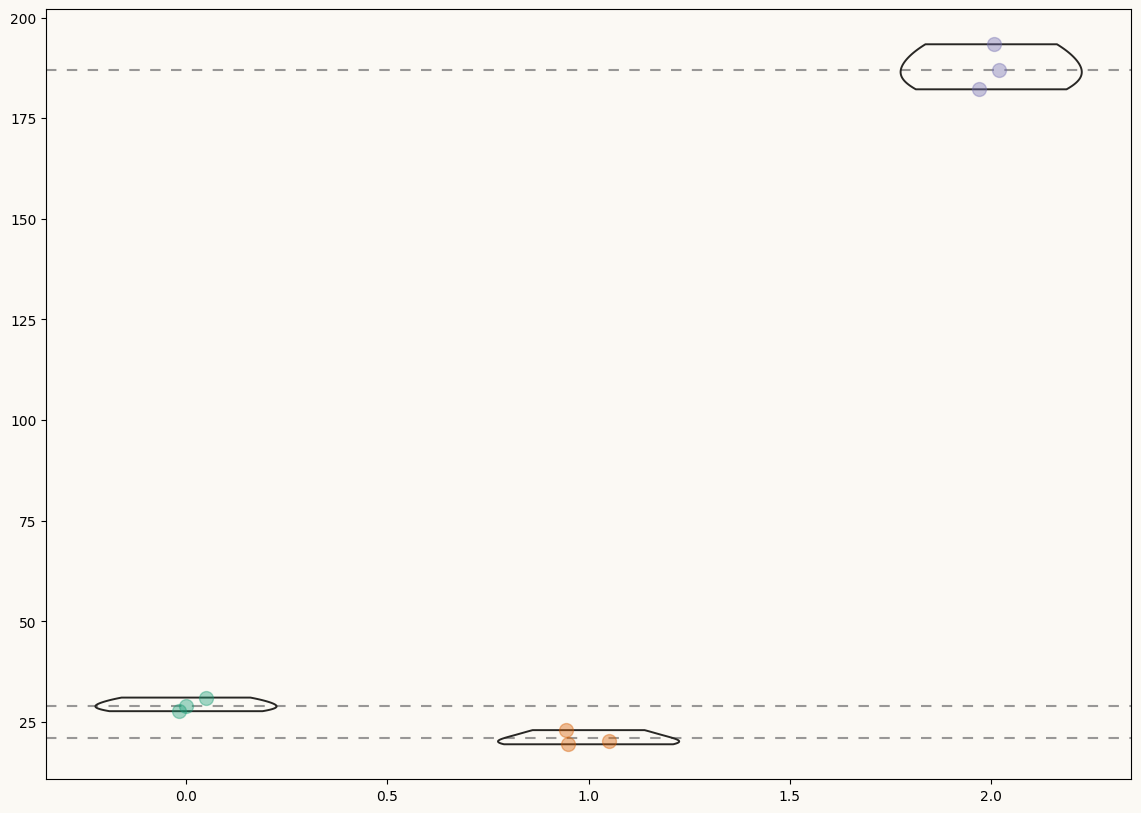

In [7]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
    
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

# ax.boxplot(
#     y_data,
#     positions=POSITIONS, 
#     showfliers = False, # Do not show the outliers beyond the caps.
#     showcaps = False,   # Do not show the caps
#     medianprops = medianprops,
#     whiskerprops = boxprops,
#     boxprops = boxprops
# )

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

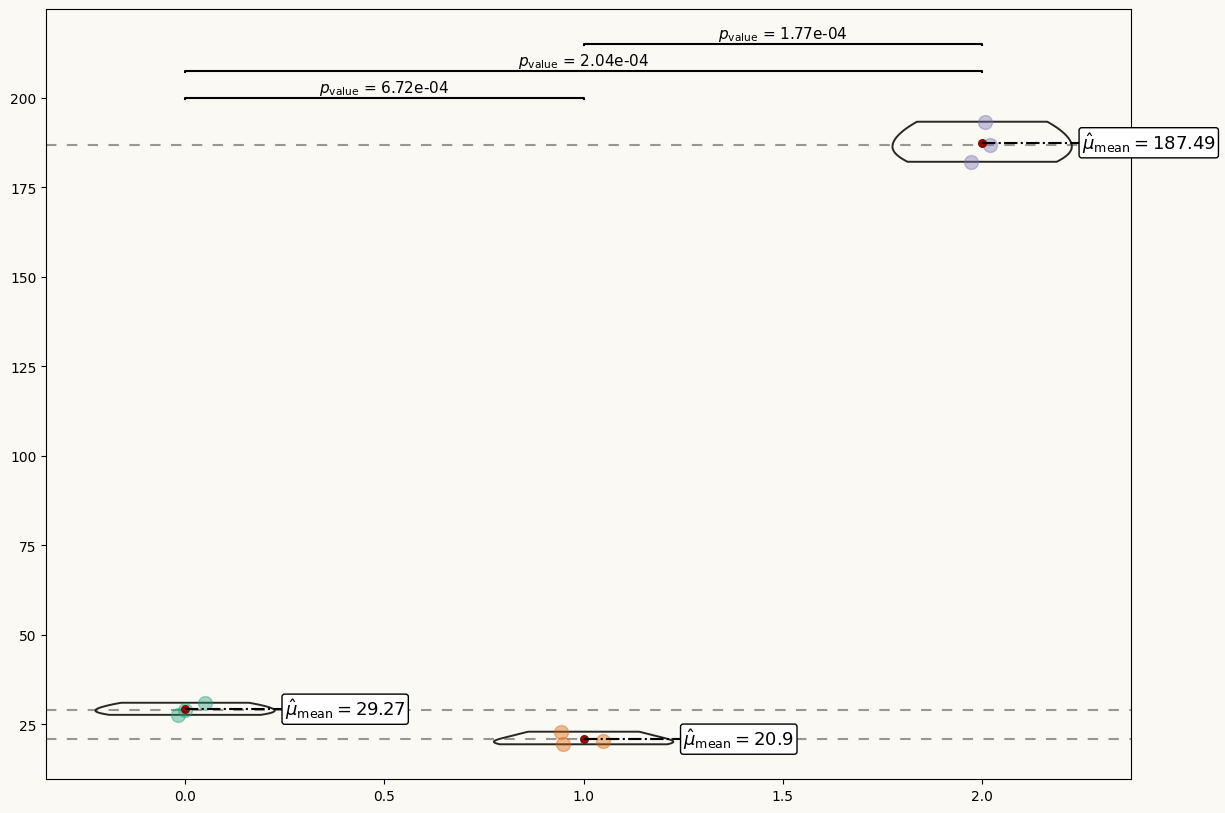

In [8]:
# Add mean value labels ------------------------------------------
means = [y.mean() for y in y_data]
for i, mean in enumerate(means):
    # Add dot representing the mean
    ax.scatter(i, mean, s=30, color=RED_DARK, zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
    # Add mean value label.
    ax.text(
        i + 0.25,
        mean,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

# Add multiple comparisons p-value for mean difference -----------
# Plot lines indicating what means are compared
# 'tick_len' gives the length of the tick on the end of each line

#Pvalue的棒棒
tick_len = 0.25
ax.plot([0, 0, 1, 1], [200 - tick_len, 200, 200, 200 - tick_len], c="black")
ax.plot([0, 0, 2, 2], [207.5 - tick_len, 207.5, 207.5, 207.5 - tick_len], c="black")
ax.plot([1, 1, 2, 2], [215 - tick_len, 215, 215, 215 - tick_len], c="black")

#Pvalue的文字
# Add labels for the p-values
label1 = r"$p_{\rm{value}}$ = 6.72e-04"
label2 = r"$p_{\rm{value}}$ = 2.04e-04"
label3 = r"$p_{\rm{value}}$ = 1.77e-04"


#設定pvalue的文字相對棒棒的位置
pad = 0.2
ax.text(0.5, 200 + pad, label1, fontsize=11, va="bottom", ha="center")
ax.text(1, 207.5 + pad, label2, fontsize=11, va="bottom", ha="center")
ax.text(1.5, 215 + pad, label3, fontsize=11, va="bottom", ha="center")   

fig

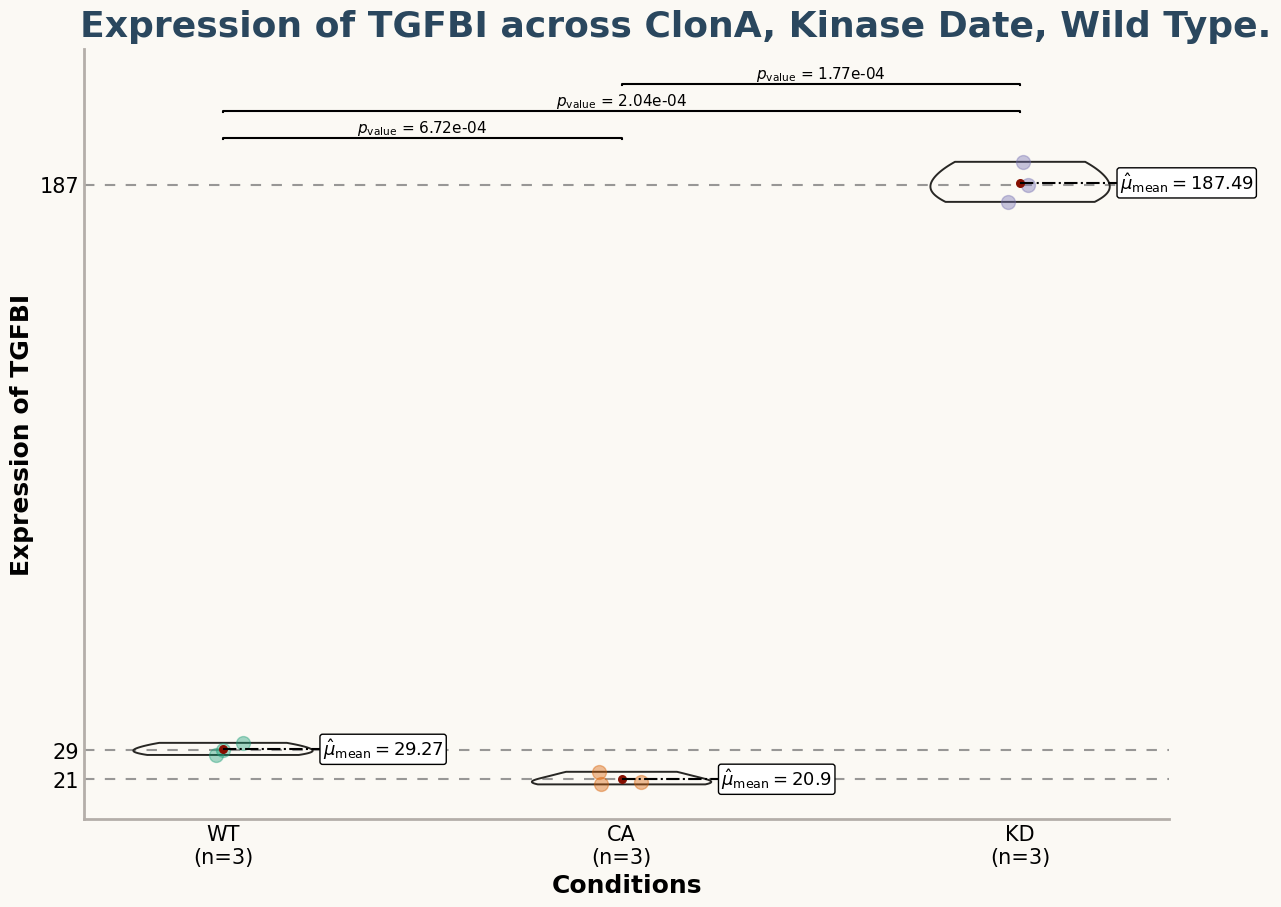

In [11]:
# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(HLINES)
ax.set_yticklabels(HLINES, size=15)
ax.set_ylabel("Expression of TGFBI", size=18, weight="bold")

# xlabels accounts for the sample size for each species
xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Conditions", size=18, weight="bold")

# Figure is used for the title and the axis is used for the subtitle
# Title
# stats = [
#     r"$\log_{\rm{e}}(\rm{BF}_{01})=-195.59$",
#     r"$\widehat{R^2}_{\rm{Bayesian}}^{\rm{posterior}}=0.70$",
#     r"$\rm{CI}_{95\%}^{\rm{HDI}}[0.67, 0.73]$",
#     r"$r^{\rm{Cauchy}}_{\rm{JZS}} = 0.71$",
# ]

fig.suptitle(
    "Expression of TGFBI across ClonA, Kinase Date, Wild Type.",
    x = 0.122,
    y = 0.920,
    ha="left",
    fontsize=26,
    color=BLUE,
    weight="bold"
) #fontname="Lobster Two",

fig
# plt.savefig('foo.pdf') #存出來是空白的
# fig.savefig('TGFBI.pdf') #不能看fig，就可以存

# Subtitle   
# stats = [
#     r"$F_{\rm{Welch}}$(2, 165.34)=409.93",
#     r"p=8.27e-65",
#     r"$\widehat{\omega_p^2}$=0.83",
#     r"CI$_{95\%}$[0.79, 0.86]",
#     r"n$_{\rm{obs}}$=333"
# ]

# ax.set_title(
#     ", ".join(stats),
#     loc="left",
#     ha="left",
#     fontsize=20,
#     color=BLUE_DARK
# )

# Notes on bottom-right
# fig.text(
#     0.55,
#     0.03,
#     ", ".join(stats),
#     fontsize=10
# )

# fig.text(
#     0.55,
#     0.005,
#     r"Pairwise test: $\bf{Games-Howell}$ $\bf{test}$; Comparisons shown: $\bf{Only}$ $\bf{significant}$",
#     fontsize=10
# )

In [10]:
print(type(fig))

<class 'matplotlib.figure.Figure'>
